<a href="https://colab.research.google.com/github/JakeOh/202205_itw_bd34/blob/main/ml09_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# 이진 분류(Binary class classification)

Breast cancer 데이터 셋에서 악성종양(malignant)/양성종양(benign) 분류

## 데이터 준비

In [2]:
cancer = datasets.load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
X = cancer.data.copy()  # cancer['data']
y = cancer.target.copy()  # cancer['target']

In [6]:
X.shape, y.shape

((569, 30), (569,))

## 데이터 탐색

In [9]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [14]:
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


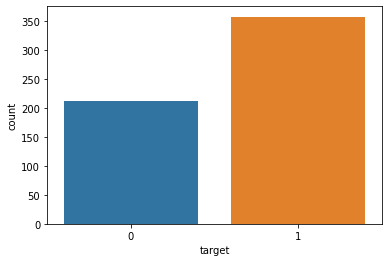

In [15]:
sns.countplot(x='target', data=cancer_df)
plt.show()

In [16]:
cancer_df['mean area'].describe()

count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: mean area, dtype: float64

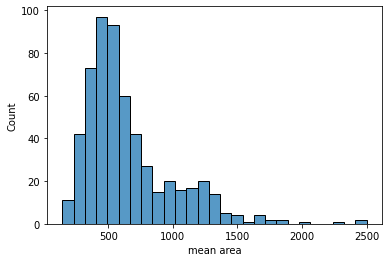

In [17]:
sns.histplot(data=cancer_df, x='mean area')
plt.show()

In [18]:
cancer_df['mean radius'].describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: mean radius, dtype: float64

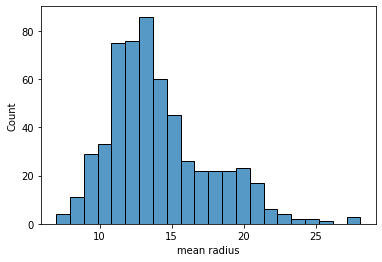

In [19]:
sns.histplot(data=cancer_df, x='mean radius')
plt.show()

## 훈련 셋, 테스트 셋 분리

In [20]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.2,
                                          random_state=42,
                                          stratify=y)

In [22]:
X_tr.shape, y_tr.shape

((455, 30), (455,))

In [23]:
np.unique(y_tr, return_counts=True)

(array([0, 1]), array([170, 285]))

In [24]:
np.unique(y_te, return_counts=True)

(array([0, 1]), array([42, 72]))

## KNN classifier

In [25]:
knn_model = Pipeline([('scaler', StandardScaler()),
                      ('clf', KNeighborsClassifier())])

In [26]:
knn_model.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])

In [27]:
# 훈련 셋 예측값
tr_pred = knn_model.predict(X_tr)

In [28]:
confusion_matrix(y_tr, tr_pred)

array([[161,   9],
       [  3, 282]])

In [30]:
print(classification_report(y_tr, tr_pred, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96       170
      benign       0.97      0.99      0.98       285

    accuracy                           0.97       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455



In [33]:
# 테스트 셋 예측값
te_pred = knn_model.predict(X_te)

In [34]:
confusion_matrix(y_te, te_pred)

array([[39,  3],
       [ 2, 70]])

In [35]:
print(classification_report(y_te, te_pred, target_names=cancer.target_names))

              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### precision-recall curve

정밀도(precision)과 재현율(recall)은 trade-off 관계.

같은 정확도(accuarcy)에서 정밀도가 높아지면 재현율은 낮아지고, 정밀도가 낮아지면 재현율이 높아짐.

precision-recall curve: 정밀도를 y축, 재현율을 x축으로 설정해서, 정밀도와 재현율의 trade-off 관계를 시각화한 그래프.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


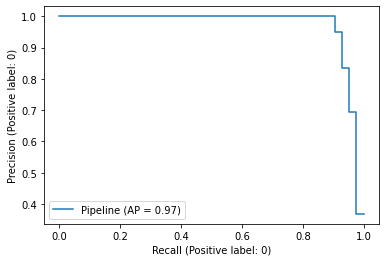

In [40]:
plot_precision_recall_curve(estimator=knn_model,  # 예측기(ML 모델)
                            X=X_te,               # 데이터(특성 2차원 배열)
                            y=y_te,               # 레이블(타겟 1차원 배열)
                            pos_label=0)          # 양성(positive)로 사용할 레이블
plt.show()

deprecate warning을 없애기 위해서 Scikit-Learn 1.0 버전에서 새로 생긴 메서드를 사용.

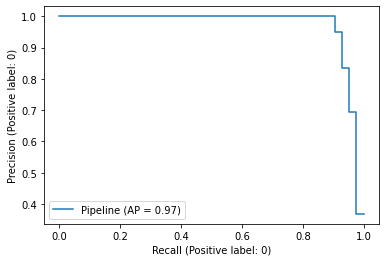

In [43]:
PrecisionRecallDisplay.from_estimator(estimator=knn_model,
                                      X=X_te,
                                      y=y_te,
                                      pos_label=0)
plt.show()

### ROC(Reciver Operating Characteristic) Curve

* ROC curve: FPR(False Postive Rate, 가짜 양성 비율)를 x축, TPR(True Postive Rate, 진짜 양성 비율)를 y축으로 설정해서, FPR과 TPR 사이의 trade-off 관계를 시각화.

* TPR = TP / (TP + FN): 실제 양성 샘플들 중에서 정답 비율. 재현율(recall)의 다른 용어.

* FPR = FP / (FP + TN): 실제 음성 샘플들 중에서 오답(가짜 양성. 양성 예측) 비율.

* TNR = TN / (FP + TN): 실제 음성 샘플들 중에서 정답(진짜 음성) 비율. 특이도(specificity).
    *  TNR + FPR = 1
    *  TNR = 1 - FPR

* AUC(Area Under Curve): ROC Curve 아래쪽의 넓이.
    * AUC가 1에 가까울 수록 좋은 모델.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


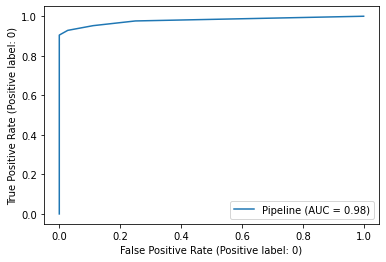

In [44]:
plot_roc_curve(estimator=knn_model,
               X=X_te,
               y=y_te,
               pos_label=0)
plt.show()

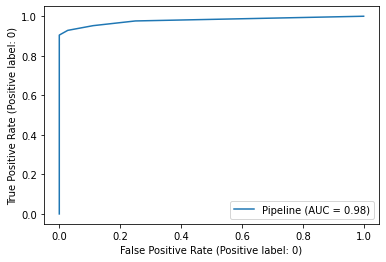

In [45]:
RocCurveDisplay.from_estimator(estimator=knn_model,
                               X=X_te,
                               y=y_te,
                               pos_label=0)
plt.show()

## Logistic Regression

## SGD classifier